In [1]:
!pip install awswrangler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.9/396.9 kB 35.4 MB/s eta 0:00:00


In [2]:
import awswrangler as wr
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
import gc

gc.collect()

2337

## Converting csv dataset to parquet

In [5]:
#Convert the csv file into a parquet file for easier reading into dataframes
import pyarrow as pa
import pyarrow.parquet as pq

csv_file = 's3://uscrn-soilmoisture-ml/shiva/hydra/hydra_soil_rleeper_final_from_dev_table.csv'
parquet_file = 's3://uscrn-soilmoisture-ml/shiva/hydra/parquet/my_parquet.parquet'
chunksize = 100_000

columns = ['WBAN','station_ID','UTC_Start','Temperature','Precipitation','Tipping_Bucket','Wetness1','Wetness2','Variable','Depth','Dielectric','Volumetric','FlagBit','AutoFlag','NoPrcpResponse','FrozenRecovery','Noise','Failure','Static','Erratic','DiurnalNoise','Toohigh','Scaling','Zero','Spike']
#column_dtypes = {'col_1': 'Int64','col_2':'Int64','col_3': 'str','col_4': 'float64','col_5': 'float64','col_6': 'float64','col_7': 'float64','col_8':'Int64','col_9':'str','col_10':'Int64','col_11': 'float64','col_12': 'float64','col_13':'float64','col_14':'float64','col_15':'float64','col_16':'float64','col_17':'float64','col_18':'float64','col_19':'float64','col_20':'float64','col_21':'float64','col_22':'float64','col_23':'float64','col_24':'float64','col_25':'float64'} 
parse_dates = ['UTC_Start']
#d = pd.read_csv('data.csv', header=None, names=column_names, dtype=column_dtypes,parse_dates=parse_dates)
csv_stream = pd.read_csv(csv_file,sep=',', header=None, names=columns,dtype={'Wetness2':'float64'}, parse_dates=parse_dates,chunksize=chunksize, low_memory=False)
#csv_stream = pd.read_csv(csv_file, sep=',', chunksize=chunksize, low_memory=False)

for i, chunk in enumerate(csv_stream):
    print("Chunk", i)
    if i == 0:
        # Guess the schema of the CSV file from the first chunk
        parquet_schema = pa.Table.from_pandas(df=chunk).schema
        # Open a Parquet file for writing
        parquet_writer = pq.ParquetWriter(parquet_file, parquet_schema, compression='snappy')
    # Write CSV chunk to the parquet file
    table = pa.Table.from_pandas(chunk, schema=parquet_schema)
    parquet_writer.write_table(table)

parquet_writer.close()

Chunk 0
Chunk 1
Chunk 2
Chunk 3
Chunk 4
Chunk 5
Chunk 6
Chunk 7
Chunk 8
Chunk 9
Chunk 10
Chunk 11
Chunk 12
Chunk 13
Chunk 14
Chunk 15
Chunk 16
Chunk 17
Chunk 18
Chunk 19
Chunk 20
Chunk 21
Chunk 22
Chunk 23
Chunk 24
Chunk 25
Chunk 26
Chunk 27
Chunk 28
Chunk 29
Chunk 30
Chunk 31
Chunk 32
Chunk 33
Chunk 34
Chunk 35
Chunk 36
Chunk 37
Chunk 38
Chunk 39
Chunk 40
Chunk 41
Chunk 42
Chunk 43
Chunk 44
Chunk 45
Chunk 46
Chunk 47
Chunk 48
Chunk 49
Chunk 50
Chunk 51
Chunk 52
Chunk 53
Chunk 54
Chunk 55
Chunk 56
Chunk 57
Chunk 58
Chunk 59
Chunk 60
Chunk 61
Chunk 62
Chunk 63
Chunk 64
Chunk 65
Chunk 66
Chunk 67
Chunk 68
Chunk 69
Chunk 70
Chunk 71
Chunk 72
Chunk 73
Chunk 74
Chunk 75
Chunk 76
Chunk 77
Chunk 78
Chunk 79
Chunk 80
Chunk 81
Chunk 82
Chunk 83
Chunk 84
Chunk 85
Chunk 86
Chunk 87
Chunk 88
Chunk 89
Chunk 90
Chunk 91
Chunk 92
Chunk 93
Chunk 94
Chunk 95
Chunk 96
Chunk 97
Chunk 98
Chunk 99
Chunk 100
Chunk 101
Chunk 102
Chunk 103
Chunk 104
Chunk 105
Chunk 106
Chunk 107
Chunk 108
Chunk 109
Chunk 110


## Data exploration and visualization

In [37]:
filter_condition = ('station_ID', '==', 1007)
df = pd.read_parquet('s3://uscrn-soilmoisture-ml/shiva/hydra/parquet/my_parquet.parquet',engine='pyarrow',filters=[filter_condition])


In [30]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [38]:
columns = ['WBAN','station_ID','UTC_Start','Temperature','Precipitation','Tipping_Bucket','Wetness1','Wetness2','Variable','Depth','Dielectric','Volumetric','FlagBit','AutoFlag','NoPrcpResponse','FrozenRecovery','Noise','Failure','Static','Erratic','DiurnalNoise','Toohigh','Scaling','Zero','Spike']
df.head()

,WBAN,station_ID,UTC_Start,Temperature,Precipitation,Tipping_Bucket,Wetness1,Wetness2,Variable,Depth,Dielectric,Volumetric,FlagBit,AutoFlag,NoPrcpResponse,FrozenRecovery,Noise,Failure,Static,Erratic,DiurnalNoise,Toohigh,Scaling,Zero,Spike
0,27516,1007,2009-01-01 00:00:00,-21.351,0.2,0.0,30.0,2670.0,None,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
1,27516,1007,2009-01-01 01:00:00,-20.022,0.0,0.0,29.0,1577.0,None,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
2,27516,1007,2009-01-01 02:00:00,-17.937,0.0,0.0,31.0,2836.0,None,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
3,27516,1007,2009-01-01 03:00:00,-18.892,0.0,0.0,29.0,2843.0,None,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
4,27516,1007,2009-01-01 04:00:00,-19.497,0.0,0.0,29.0,2766.0,None,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
df['Variable'].unique()

array([None], dtype=object)

In [18]:
print(df['Variable'].isna().sum())
df['Variable'].fillna(method='ffill', inplace=True)
print(df['Variable'].isna().sum())

3587
0


/tmp/ipykernel_372/2863649074.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Variable'].fillna(method='ffill', inplace=True)


In [23]:
df['Variable'] = df['Variable'].apply(extract_depth)

In [24]:
df['Variable'].head()

0    1005
1    1005
2    1005
3    1005
4    1005
Name: Variable, dtype: int64

### Unique stations in data

In [10]:
import pyarrow.parquet as pq
parquet_file = pq.ParquetFile('s3://uscrn-soilmoisture-ml/shiva/hydra/parquet/my_parquet.parquet')
tab = parquet_file.read(columns=['station_ID','Variable']).to_pandas()

In [11]:
print(len(tab['station_ID'].unique()))
print(tab['station_ID'].unique())

235
[1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014
 1015 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029
 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043
 1045 1046 1047 1049 1050 1066 1067 1068 1085 1105 1106 1107 1108 1109
 1110 1111 1112 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123
 1124 1125 1128 1129 1130 1138 1139 1140 1141 1142 1143 1144 1145 1166
 1186 1187 1231 1232 1233 1234 1235 1236 1266 1267 1268 1269 1296 1297
 1306 1307 1326 1327 1328 1329 1346 1347 1366 1386 1387 1406 1407 1426
 1446 1447 1467 1468 1487 1507 1508 1509 1510 1528 1529 1530 1531 1532
 1550 1551 1552 1570 1590 1610 1611 1612 1613 1630 1631 1632 1650 1651
 1652 1653 1654 1655 1656 1657 1658 1660 1661 1670 1671 1691 1692 1694
 1695 1696 1697 1698 1701 1702 1703 1704 1705 1706 1707 1708 1710 1711
 1712 1713 1714 1715 1716 1717 1721 1722 1726 1727 1728 1729 1730 1731
 1733 1734 1735 1736 1737 1738 1739 1740 1741 1742 1743 1744 1745 1746
 1

In [12]:
#To get number of nulls in variable column for each station
res = tab.groupby('station_ID').agg({'Variable': lambda x: x.isnull().mean()})
print(res)

            Variable
station_ID          
1001        0.026073
1002        0.007137
1003        0.029248
1004        0.010597
1005        0.008163
1006        0.001923
1007        1.000000
1008        1.000000
1009        0.055440
1010        0.011139
1011        0.013279
1012        0.004466
1013        0.002239
1014        0.012944
1015        0.034743
1017        0.013959
1018        0.013300
1019        0.006202
1020        0.009558
1021        0.038942
1022        0.015467
1023        0.003399
1024        0.020742
1025        0.023647
1026        0.005748
1027        0.004361
1028        0.002662
1029        0.028058
1030        0.002269
1031        0.032723
1032        0.026568
1033        0.008050
1034        0.021643
1035        0.007640
1036        0.015869
1037        0.002931
1038        0.006571
1039        0.008114
1040        0.019737
1041        0.017320
1042        0.007539
1043        0.007145
1045        0.037393
1046        0.032741
1047        0.002627
1049        0

In [13]:
station_no_variable = list(res[res.Variable==1.0].index)
print(station_no_variable)

[1007, 1008, 1112, 1143, 1166, 1186, 1187, 1266, 1267, 1268, 1269, 1296, 1297, 1326, 1327, 1328, 1329, 1366, 1509, 1550, 1551, 1552, 1630, 1631, 1632, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1660, 1661, 1670, 1671, 1691, 1692, 1694, 1695, 1696, 1697, 1698, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1721, 1722, 1726, 1727, 1728, 1729, 1730, 1731, 1733, 1734, 1735, 1736, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1754, 1755, 1756, 1771, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1798, 1799, 1800, 1801]


In [15]:
df['Variable'].unique()

array(['sm1005', 'sm1010', 'sm1020', 'sm1050', 'sm1100', 'sm2005',
       'sm2010', 'sm2020', 'sm2050', 'sm2100', 'sm3005', 'sm3010',
       'sm3020', 'sm3050', 'sm3100', None], dtype=object)

In [ ]:
## df['Volumetric'].plot()

In [6]:
def any_flags(row):
    count =  row['AutoFlag'] + row['NoPrcpResponse'] + row['FrozenRecovery'] + row['Noise'] + row['Failure'] + row['Static'] + row['Erratic'] + row['DiurnalNoise'] + row['Toohigh'] + row['Scaling'] + row['Zero'] + row['Spike']
    if count == 0:
        return 0
    else:
        return 1

def extract_depth(row):
    return int(row[-4:])

In [27]:
sns.set_style('white')

def plot_everything(station,df):
    station_df = df.copy()
    #station_df['UTC_Start'] = pd.to_datetime(station_df['UTC_Start'])
    # None values in variable
    station_df['Variable'].fillna(method='ffill', inplace=True)
    station_df['Variable'].fillna(method='bfill', inplace=True)
    station_df['Variable'] = station_df['Variable'].apply(extract_depth)
    station_df['Flag'] = station_df.apply(lambda x: any_flags(x), axis=1)

    station_df.loc[station_df['Volumetric'] <-5, 'Volumetric'] = 0
    station_df.loc[station_df['Volumetric'] > 2, 'Volumetric'] = 0

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
    
    color = 'tab:blue'
    sns.scatterplot(ax=ax1,data=station_df, x='UTC_Start', y='Volumetric', hue='Flag', s=5, alpha=0.5)
    ax1.set_ylabel('Volumetric', color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xlabel('Time', fontsize = 20)
    ax1.tick_params(axis='x', labelrotation=30)
    ax1.set_title(f'Station {station}', fontsize = 30)

    color = 'tab:red'
    sns.scatterplot(ax=ax2, data=station_df,x='UTC_Start', y='Precipitation',  color=color, marker='x', s=25, alpha=0.75)
    ax2.set_ylabel('Precipitation', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_xlabel('Time', fontsize = 20)
    ax2.tick_params(axis='x', labelrotation=30)
    plt.tight_layout()
    plt.show()
    
    g = sns.FacetGrid(station_df, row = 'Variable', hue = 'Flag', aspect = 4, sharey = False,sharex=False)
    g.map(sns.scatterplot, 'UTC_Start', 'Volumetric', s = 3)
    g.set(ylim=(-0.1))
    g.add_legend()
    g.tick_params(axis='x', labelrotation=30)
    g.set_xticklabels(rotation = 45)
    g.tight_layout()

In [28]:
import gc
def plot_please(station_ID):
    if station_ID in station_no_variable:
         pass
    else:
        filter_condition = ('station_ID', '==', station_ID)
        df = pd.read_parquet('s3://uscrn-soilmoisture-ml/shiva/hydra/parquet/my_parquet.parquet',engine='pyarrow',filters=[filter_condition])
        columns = ['WBAN','station_ID','UTC_Start','Temperature','Precipitation','Tipping_Bucket','Wetness1','Wetness2','Variable','Depth','Volumetric','FlagBit','AutoFlag','NoPrcpResponse','FrozenRecovery','Noise','Failure','Static','Erratic','DiurnalNoise','Toohigh','Scaling','Zero','Spike','col_25']
        plot_everything(station_ID,df)
        del [df]
        gc.collect()

## Station 1001

In [7]:
sns.set()

In [36]:
filter_condition = ('station_ID', '==', 1777)
df = pd.read_parquet('s3://uscrn-soilmoisture-ml/shiva/hydra/parquet/my_parquet.parquet',engine='pyarrow',filters=[filter_condition])
df.loc[df['Volumetric'] > 2, 'Volumetric'] = 0
df.head()

,WBAN,station_ID,UTC_Start,Temperature,Precipitation,Tipping_Bucket,Wetness1,Wetness2,Variable,Depth,Dielectric,Volumetric,FlagBit,AutoFlag,NoPrcpResponse,FrozenRecovery,Noise,Failure,Static,Erratic,DiurnalNoise,Toohigh,Scaling,Zero,Spike
0,94097,1777,2011-09-21 22:00:00,26.185,0.0,NaN,1221.0,3047.0,None,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
1,94097,1777,2011-09-21 23:00:00,25.753,0.0,NaN,1204.0,3047.0,None,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
2,94097,1777,2011-09-22 00:00:00,25.025,0.0,NaN,1169.0,3045.0,None,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
3,94097,1777,2011-09-22 01:00:00,21.108,0.0,NaN,1151.0,3043.0,None,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
4,94097,1777,2011-09-22 02:00:00,19.819,0.0,NaN,1148.0,3042.0,None,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Plotting
for station_ID in tab['station_ID'].unique():
    plot_please(station_ID)

# sample output plots

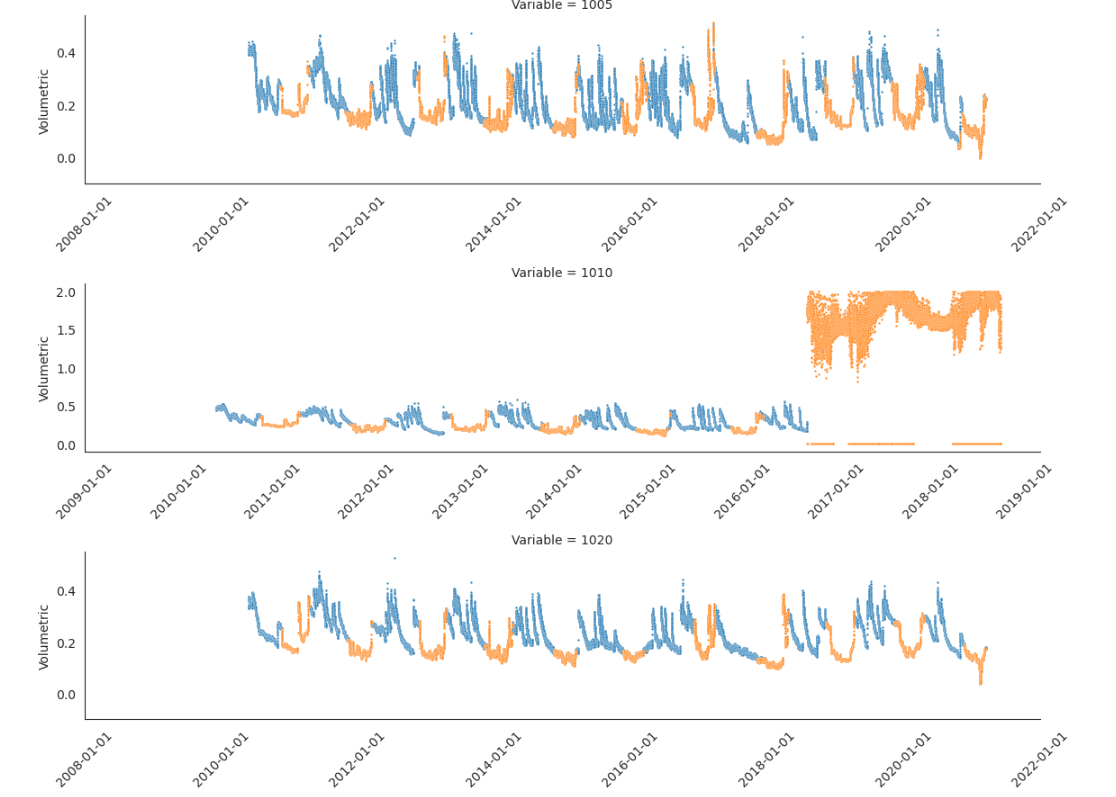